In [1]:
#Description : this program attemps to optimize a users portfolio using the Efficient Frontier



In [25]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [26]:
#Get the stock symbols/ tickers in the portfolio
#FAANG 

assets = ['BVT.JO', 'BTI.JO', 'CFR.JO', 'IMP.JO', 'SUR.JO', 'ADI.JO', 'APN.JO', 'CLH.JO', 'IPF.JO', 'ITE.JO', 'MTH.JO', 'PPE.JO', 'RMH.JO', 'S32.JO', 'SSS.JO', 'AIL.JO','MST.JO']

In [27]:
# #Get the stock symbols/ tickers in the portfolio
# #FAANG 

# assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', ]

In [28]:
#Assign weights to the stocks.
weights = np.array([0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.057, 0.056, 0.056, 0.056, 0.056]) #20 percent each

In [29]:
# #Assign weights to the stocks.
# weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #20 percent each

In [30]:
#Get the stock/portfolio starting date
stockStartDate = '2012-01-01'

In [31]:
#Get the stock stocks ending date (date)
today = datetime.today().strftime('%Y-%m-%d')
today

'2022-04-17'

In [32]:
#create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into df 
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

RemoteDataError: No data fetched for symbol ADI.JO using YahooDailyReader

In [ ]:
#Show the df
df

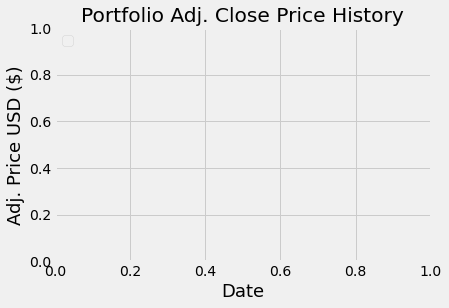

In [11]:
# visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()

In [12]:
#Show the daily simply return
returns = df.pct_change()
returns

""


In [13]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

""


In [14]:
#Create the portfol variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

ValueError: shapes (0,0) and (17,) not aligned: 0 (dim 1) != 17 (dim 0)

In [13]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

7.07025880177301

In [14]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

5.579277722888726

In [15]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str( round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100 ) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility / risk: '+ percent_vols)
print('Annual variance: '+  percent_var)

Expected annual return: 558.0%
Annual volatility / risk: 707.0%
Annual variance: 4999.0%


In [24]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [16]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [17]:
#Portfolio Optimization !

#Calculate the expected returns and the annualised sample covariance matrixof asset returns
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)


#Optimize for max sharpe ratio 
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('BVT.JO', 0.26312), ('BTI.JO', 0.05862), ('CFR.JO', 0.19734), ('IMP.JO', 0.0), ('SUR.JO', 0.02657), ('ADI.JO', 0.06992), ('APN.JO', 0.0), ('CLH.JO', 0.0), ('IPF.JO', 0.0), ('ITE.JO', 0.17692), ('MTH.JO', 0.0), ('PPE.JO', 0.03935), ('RMH.JO', 0.01046), ('S32.JO', 0.0), ('SSS.JO', 0.11259), ('AIL.JO', 0.0), ('MST.JO', 0.04504)])
Expected annual return: 29.2%
Annual volatility: 19.1%
Sharpe Ratio: 1.43


(0.2923619844268094, 0.19050350356832801, 1.429695408877985)

In [ ]:
#Highlight total  copy and paste and must add to 1 



In [42]:
#Prices two commos ahead eg R1089.00 = R189.00,  (10000000 = 100000)
#Get the discrete alloacation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 10000000)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: R{:.2f}'.format(leftover))

Discrete allocation: {'BVT.JO': 150, 'BTI.JO': 10, 'CFR.JO': 132, 'SUR.JO': 127, 'ADI.JO': 1075, 'ITE.JO': 1011, 'PPE.JO': 3027, 'RMH.JO': 540, 'SSS.JO': 824, 'MST.JO': 465}
Funds remaining: R10896.00
